In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !pip install --upgrade --force-reinstall numpy pandas matplotlib seaborn --quiet
# !pip install ydata-profiling --quiet
# !pip install sweetviz --quiet
# !pip install xgboost -- quiet
# !pip install lightgbm --quiet
# !pip install streamlit --quiet
# !pip install pyngrok --quiet

In [3]:
# !pip install ppscore --quiet

In [4]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Data Science/Projects/P596 Bankruptacy Prevention/Bankruptcy (2).xlsx")
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [6]:
df.shape

(250, 7)

In [7]:
df.size

1750

In [8]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [9]:
df.nunique()

,0
industrial_risk,3
management_risk,3
financial_flexibility,3
credibility,3
competitiveness,3
operating_risk,3
class,2


In [10]:
df.isnull().sum()

,0
industrial_risk,0
management_risk,0
financial_flexibility,0
credibility,0
competitiveness,0
operating_risk,0
class,0


In [11]:
df[df.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [12]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.corr(numeric_only=True)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


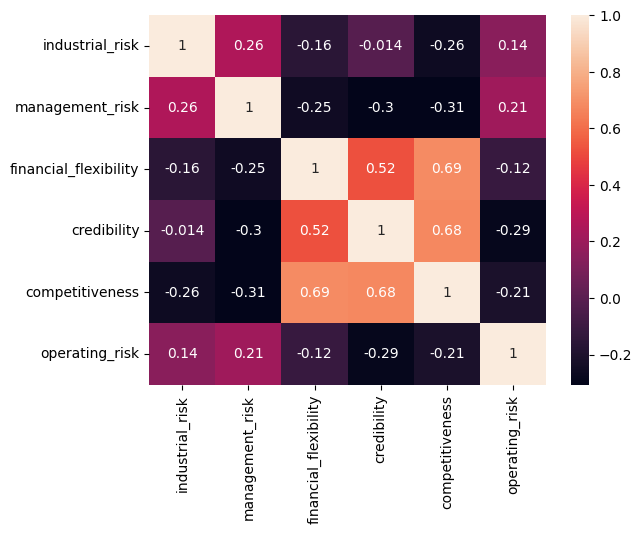

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(numeric_only=True), annot= True)
plt.show()

In [15]:
# import ppscore as pps
# pps.matrix(df)

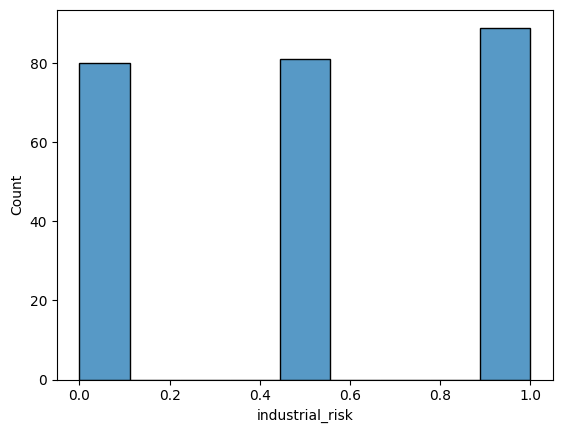

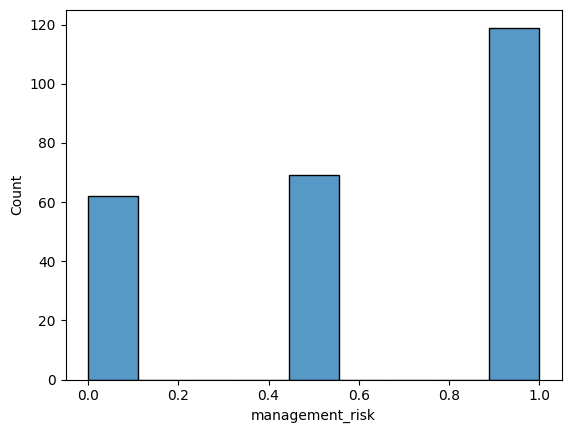

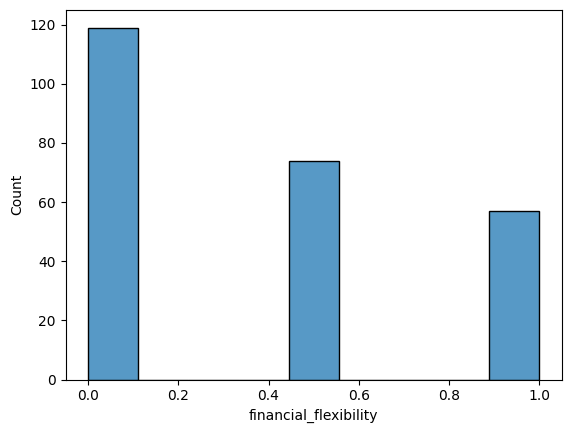

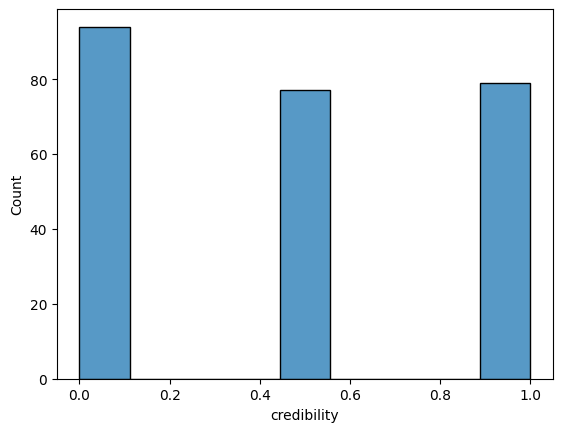

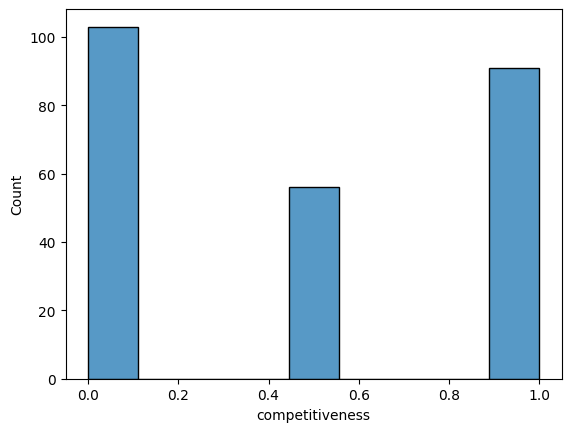

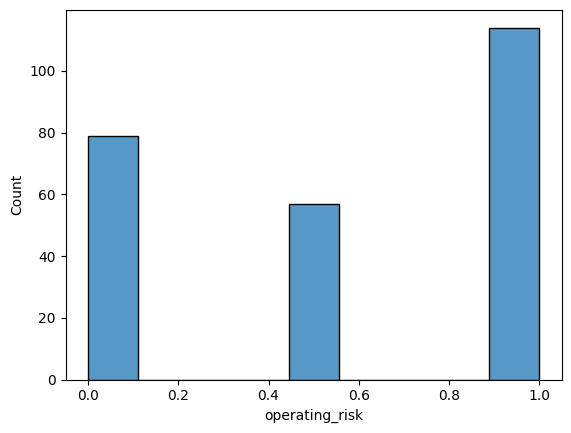

In [16]:
for i in df.select_dtypes(include=['number']).columns:
  sns.histplot(df[i])
  plt.show()

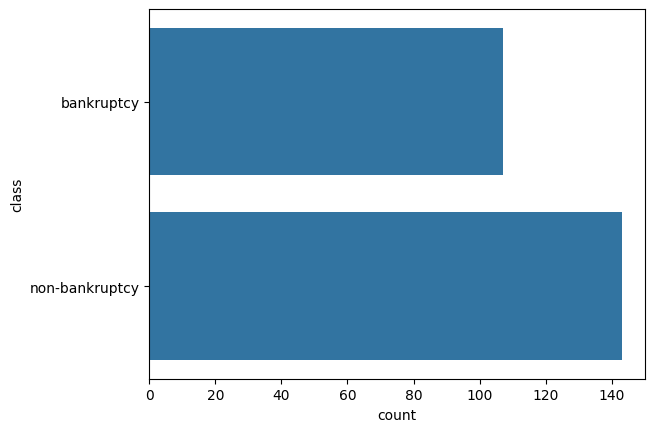

In [17]:
sns.countplot(df['class'])
plt.show()

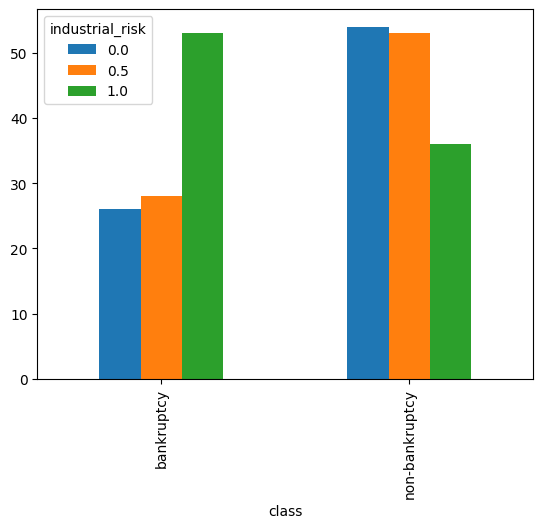

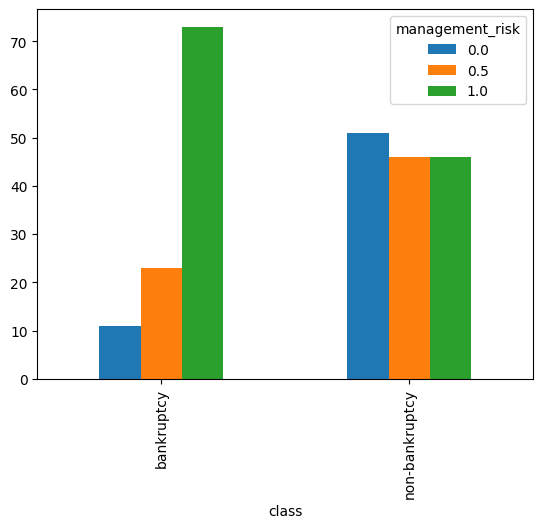

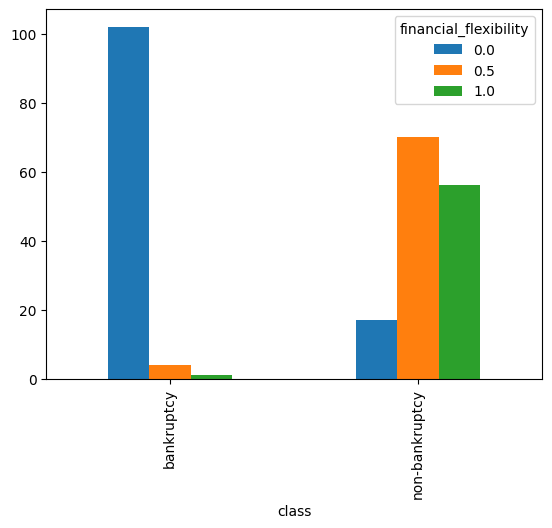

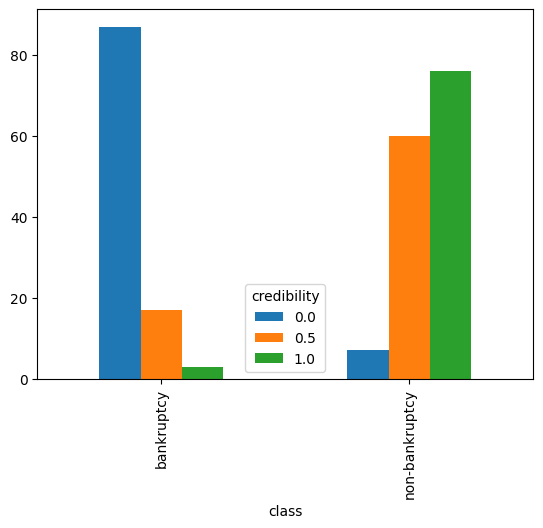

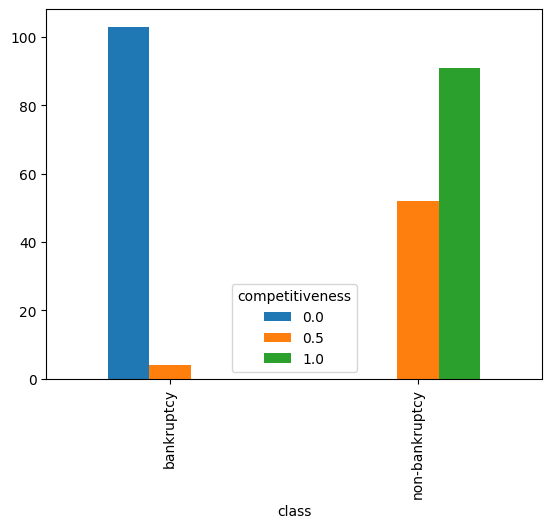

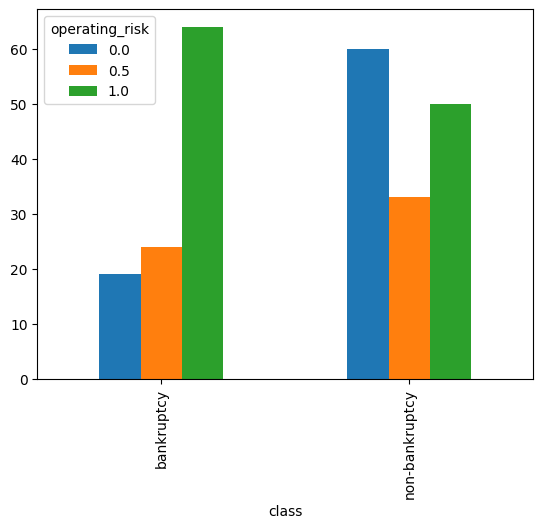

In [18]:
for i in df.select_dtypes(include=['number']).columns:
  pd.crosstab(df['class'], df[i]).plot(kind='bar')
  plt.show()

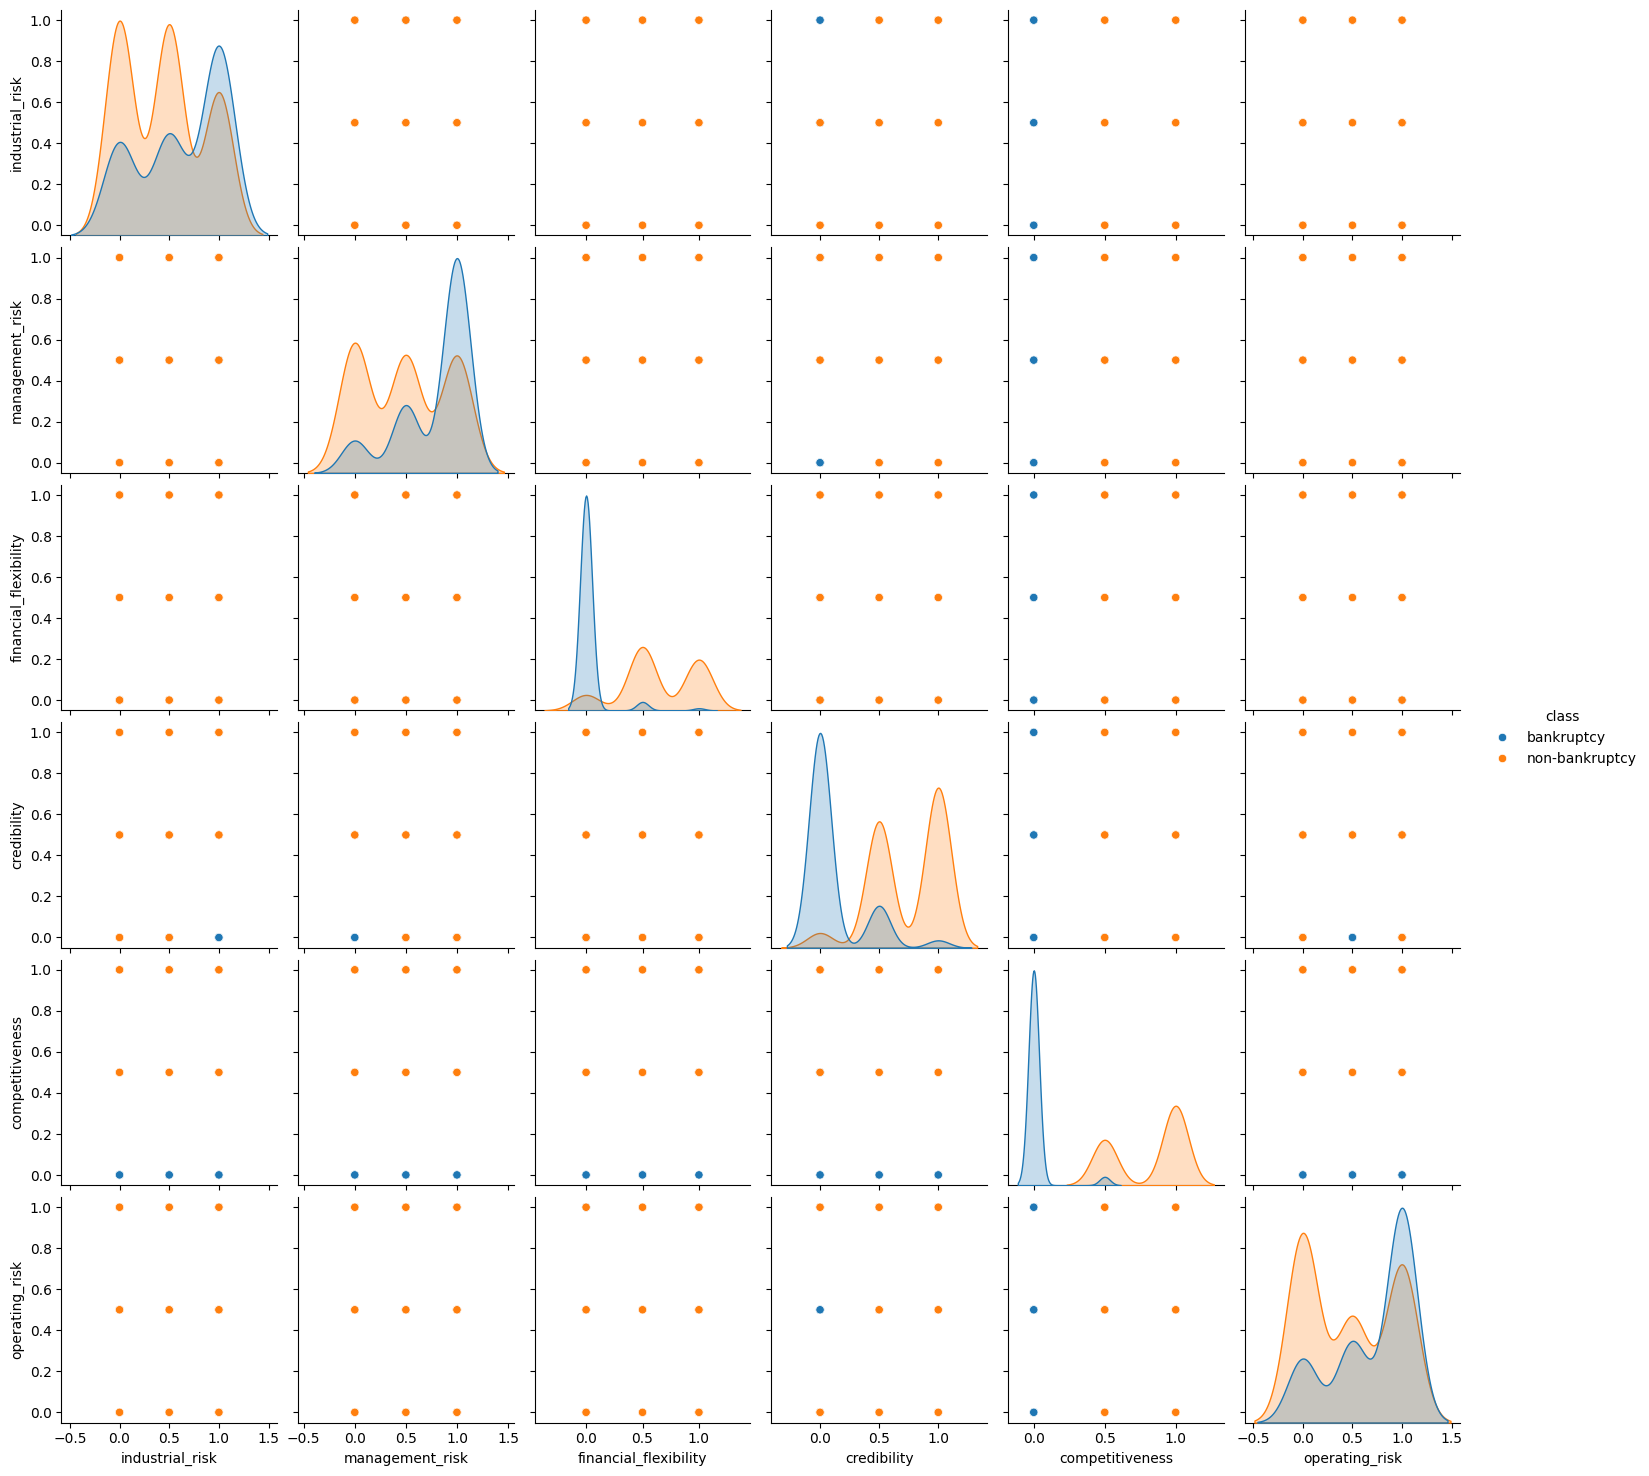

In [19]:
sns.pairplot(df, hue='class')
plt.show()

In [20]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", explorative = True)

In [21]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 14.48it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
profile.to_file("Bankruptacy_Prevention_EDA_PandasProfiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)


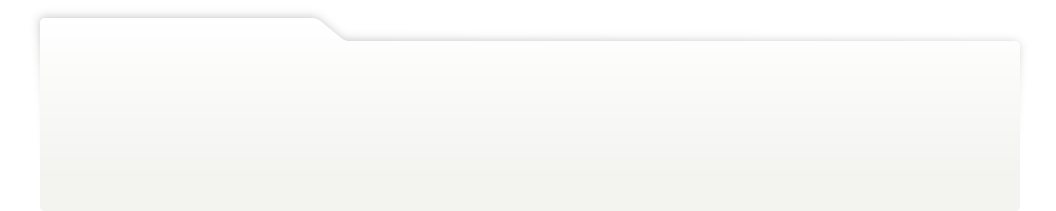
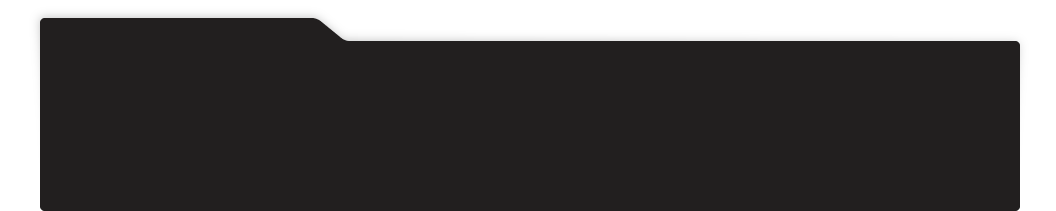
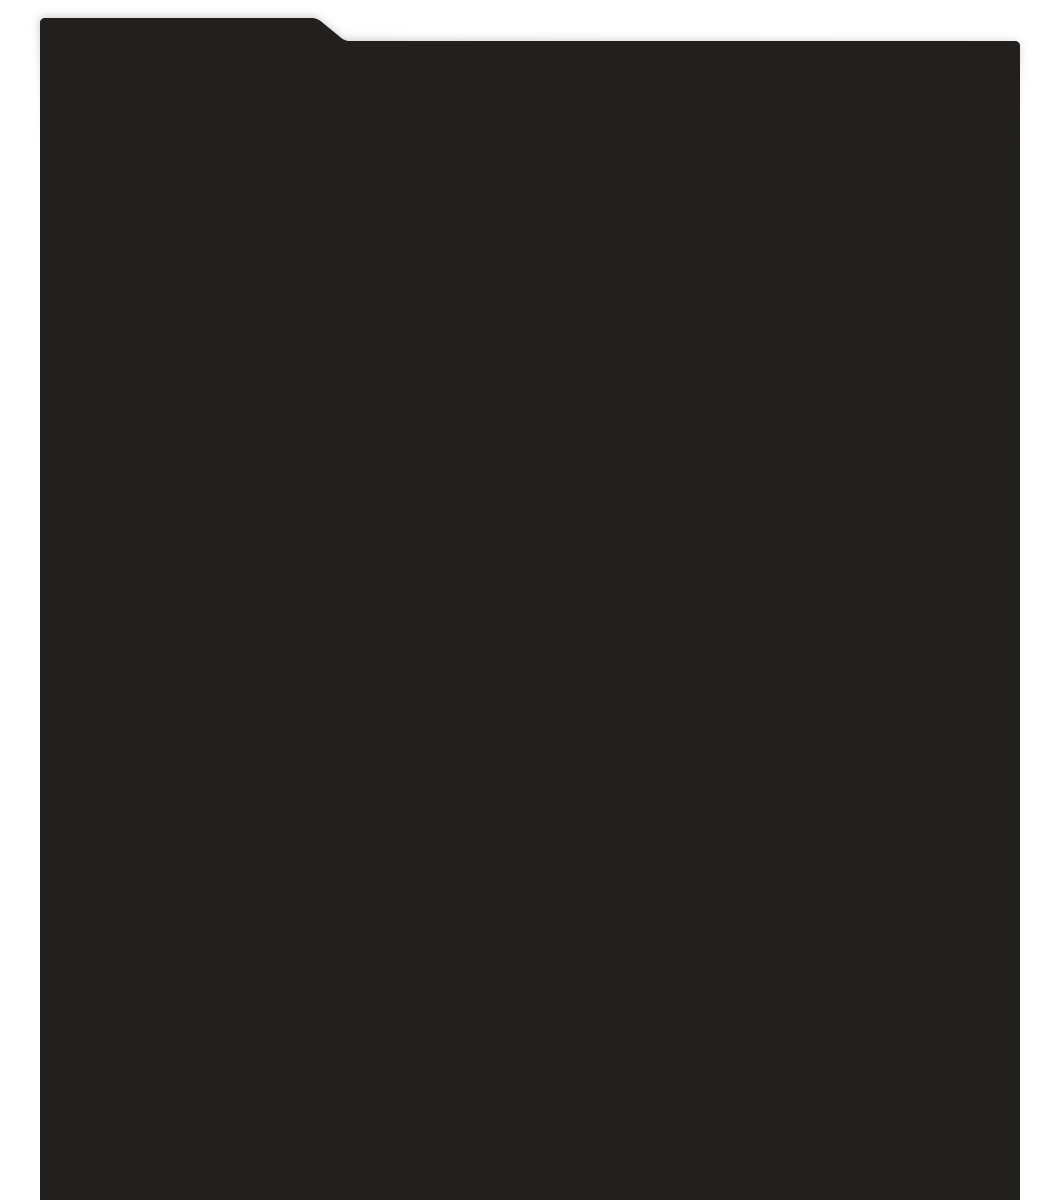
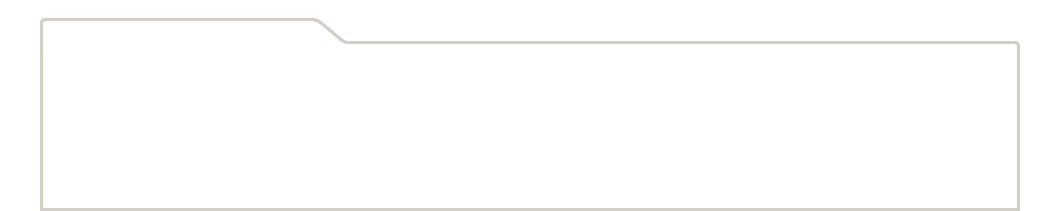
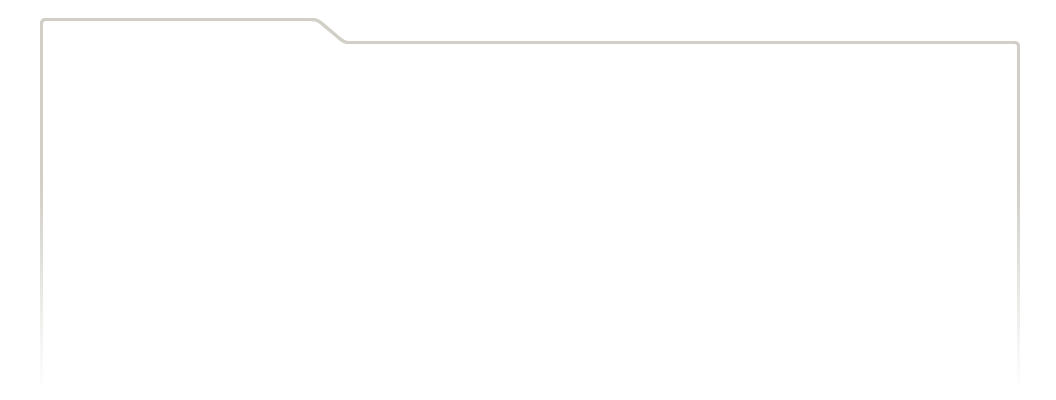
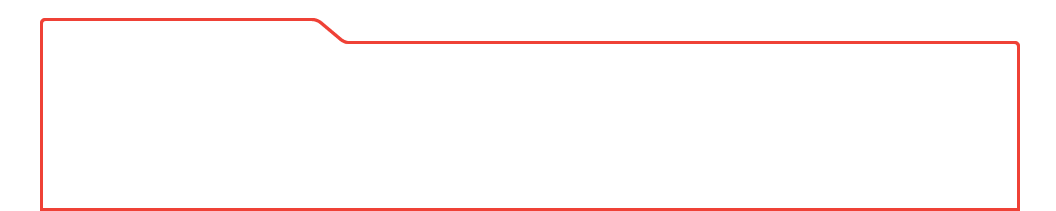
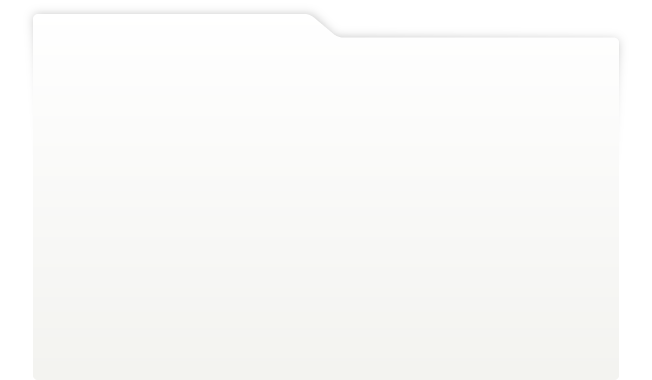
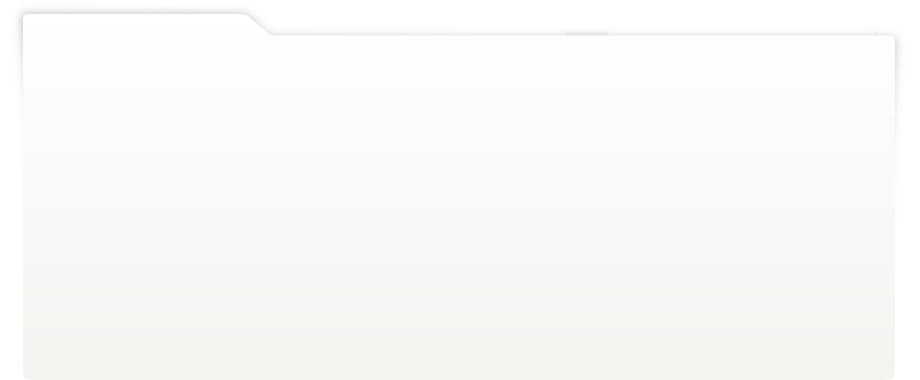
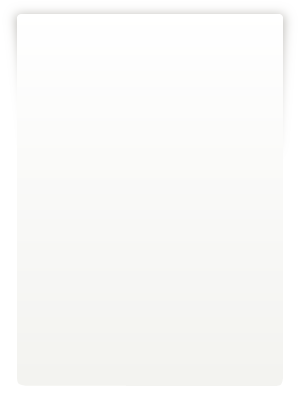
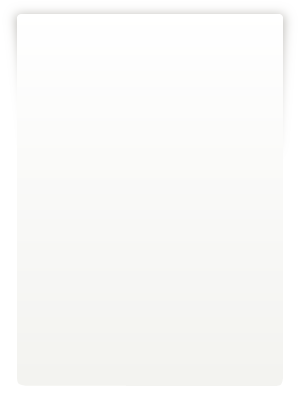
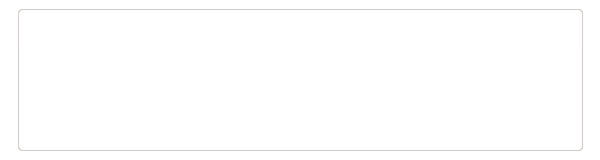
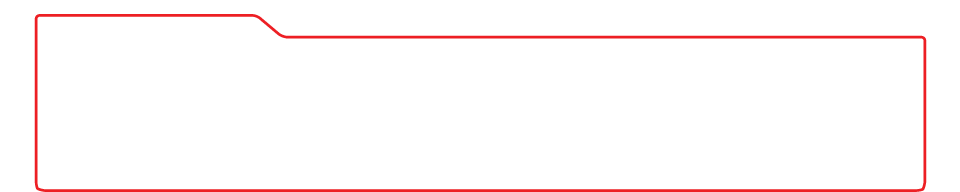
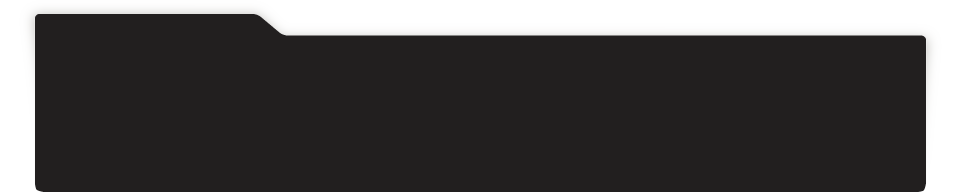
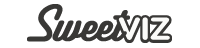
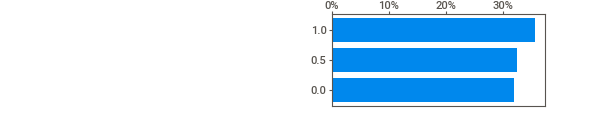
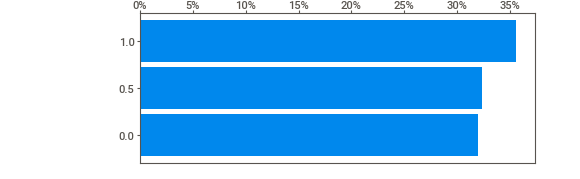
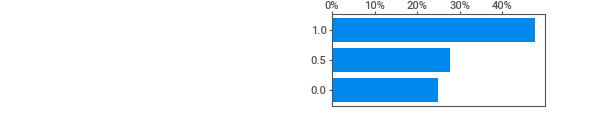
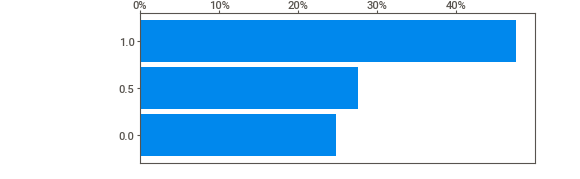
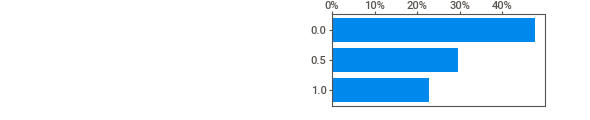
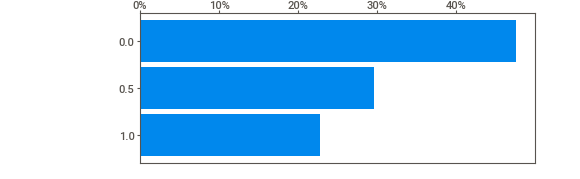
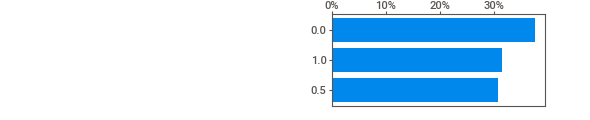
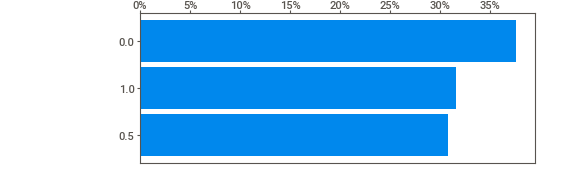
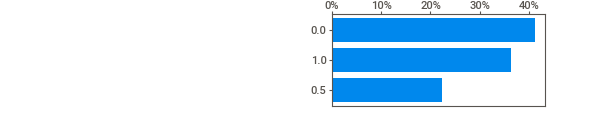
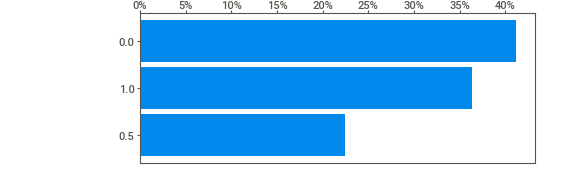
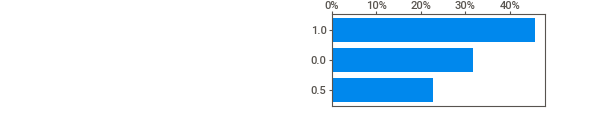
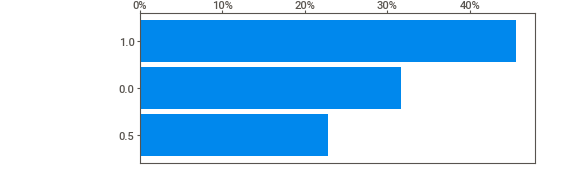
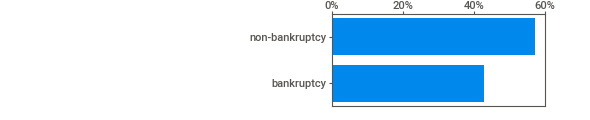
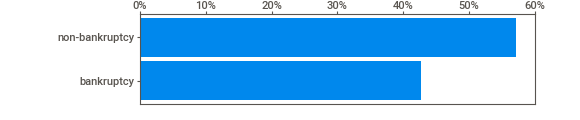
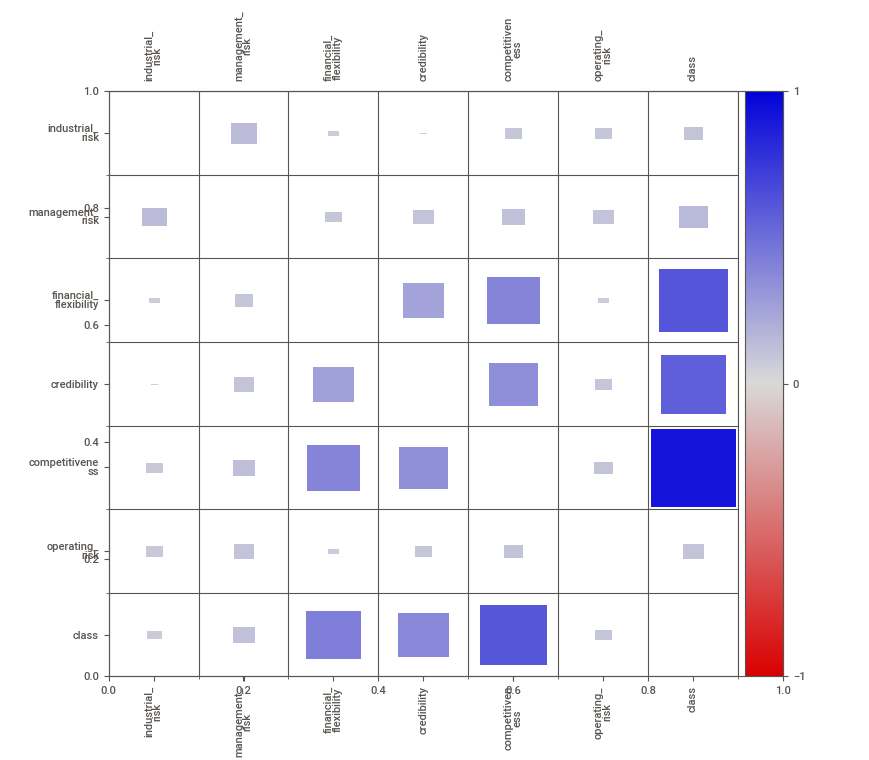
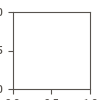

In [23]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_notebook(layout='vertical' , w=1080, h=1080, scale=1)

In [24]:
sweet_report.show_html('Bankruptacy_Prevention_EDA_SweetViz.html')

Report Bankruptacy_Prevention_EDA_SweetViz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [25]:
df['class'] = df['class'].map({'bankruptcy': 1, "non-bankruptcy": 0})
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


In [26]:
from sklearn.ensemble import IsolationForest
outliers = IsolationForest(contamination=0.01)
outliers.fit(df)

IsolationForest(contamination=0.01)

In [27]:
pred_outliers = outliers.predict(df)
pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [28]:
pd.concat((df, pd.DataFrame(outliers.decision_function(df), columns = ['anomaly_score'])), axis=1)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,anomaly_score
0,0.5,1.0,0.0,0.0,0.0,0.5,1,0.131240
1,0.0,1.0,0.0,0.0,0.0,1.0,1,0.171275
2,1.0,0.0,0.0,0.0,0.0,1.0,1,0.097953
3,0.5,0.0,0.0,0.5,0.0,1.0,1,0.057562
4,1.0,1.0,0.0,0.0,0.0,1.0,1,0.203630
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,0,0.087946
246,1.0,1.0,0.5,1.0,1.0,0.0,0,0.082904
247,0.0,1.0,1.0,0.5,0.5,0.0,0,0.074607
248,1.0,0.0,0.5,1.0,0.5,0.0,0,0.079675


In [29]:
df[pred_outliers == -1]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
36,1.0,1.0,0.0,1.0,0.0,0.0,1
72,1.0,0.5,1.0,0.5,0.0,0.0,1
192,0.5,1.0,0.0,0.0,1.0,0.0,0


In [30]:
df = df[pred_outliers != -1]
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']

In [32]:
from sklearn.feature_selection import SelectKBest, chi2
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)
pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_}).sort_values(by='Score', ascending=False)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=6. All the features will be returned.
  warnings.warn(


,Feature,Score
4,competitiveness,80.434480
2,financial_flexibility,61.985851
3,credibility,54.513344
1,management_risk,9.587466
5,operating_risk,6.830358
0,industrial_risk,3.907117


In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=300)
rfe = RFE(lr, n_features_to_select=4)
fit = rfe.fit(X, y)
pd.DataFrame({'Feature': X.columns, 'Selected': fit.support_, 'Ranking': fit.ranking_}).sort_values(by='Ranking')

,Feature,Selected,Ranking
1,management_risk,True,1
2,financial_flexibility,True,1
3,credibility,True,1
4,competitiveness,True,1
5,operating_risk,False,2
0,industrial_risk,False,3


In [34]:
from sklearn.ensemble import RandomForestClassifier
tree_based = RandomForestClassifier()
tree_based.fit(X, y)
pd.DataFrame({'Feature': X.columns, 'Importance': tree_based.feature_importances_}).sort_values(by='Importance', ascending=False)

,Feature,Importance
4,competitiveness,0.522919
2,financial_flexibility,0.220601
3,credibility,0.201784
1,management_risk,0.027942
0,industrial_risk,0.013518
5,operating_risk,0.013236


### Feature Selection Inference

We applied three different feature selection techniques — **Chi-Square Test**, **Recursive Feature Elimination (RFE)**, and **Random Forest Feature Importance** — to identify the most influential features affecting bankruptcy prediction.

---

#### A. Chi-Square Test
- Measures the statistical relationship between each feature and the target variable.  
- **Top 3 Features:**  
  1. *Competitiveness*  
  2. *Financial Flexibility*  
  3. *Credibility*
  4. *Management Risk*

These features show the strongest dependency with the target class.

---

#### B. Recursive Feature Elimination (RFE) – Logistic Regression
- Iteratively removes the least important features based on model coefficients.  
- **Selected Features:**  
  1. *Management Risk*  
  2. *Financial Flexibility*  
  3. *Credibility*  
  4. *Competitiveness*  

RFE confirms that these four features provide the best linear predictive performance.

---

#### C. Random Forest Feature Importance
- Evaluates how much each feature contributes to reducing impurity in decision trees.  
- **Most Important Features:**  
  1. *Competitiveness* (highest importance)  
  2. *Credibility*  
  3. *Financial Flexibility*  
  3. *Management Risk*  

---

#### Cross-Method Consensus
All three methods consistently highlight **Competitiveness**, **Financial Flexibility**, and **Credibility** as the most important predictors.  
`Management Risk` also shows moderate significance, while `Operating Risk` and `Industrial Risk` contribute minimally.

---

#### Final Inference
- The features **Competitiveness**, **Financial Flexibility**, and **Credibility** are the **strongest indicators** for bankruptcy prevention so they need to be included, but **Management Risk** is (Optional) to include in the dataset.  
- These variables should be prioritized for model training and interpretation.  
- Less influential features like *Operating Risk* and *Industrial Risk* may be dropped to simplify the model without losing predictive accuracy.


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=300)
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=300)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model_lr.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
[[50  0]
 [ 0 32]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        32

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [40]:
from sklearn.linear_model import Ridge
model_r = Ridge(alpha = 0.5)
model_r.fit(x_train, y_train)
print(model_r.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8994860335912565
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        32

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

[[50  0]
 [ 0 32]]


In [41]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
print(model_rf.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        32

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

[[50  0]
 [ 0 32]]


In [42]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)
print(model_ada.score(x_test, y_test))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        32

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [43]:
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf', C = 0.5, gamma=0.1)
model_svm.fit(x_train, y_train)
print(model_svm.score(x_test, y_test))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        32

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [44]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
print(model_knn.score(x_test, y_test))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        32

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [45]:
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(x_train, y_train)
print(model_nb.score(x_test, y_test))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        32

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Define base model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 2: Create parameter grid (you can adjust ranges if needed)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Step 3: Perform Grid Search with 5-fold CV
grid = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1,
                    verbose=1)

grid.fit(x_train, y_train)

# Step 4: Print best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Step 5: Evaluate the best model on test data
best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:44:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation Accuracy: 1.0

Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        32

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82


Confusion Matrix:
 [[50  0]
 [ 0 32]]


In [47]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Define base model
lgb = LGBMClassifier(random_state=42)

# Step 2: Create parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Step 3: Grid Search with 5-fold CV
grid = GridSearchCV(estimator=lgb,
                    param_grid=param_grid,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1,
                    verbose=1)

grid.fit(x_train, y_train)

# Step 4: Show best parameters and best CV score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Step 5: Evaluate best model on test data
best_lgb = grid.best_estimator_
y_pred = best_lgb.predict(x_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[LightGBM] [Info] Number of positive: 73, number of negative: 92
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 165, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442424 -> initscore=-0.231329
[LightGBM] [Info] Start training from score -0.231329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [48]:
print("Logistic Regression Accuracy:", model_lr.score(x_test, y_test))
print("Ridge Regression Accuracy:", model_r.score(x_test, y_test))
print("Random Forest Classifier Accuracy:", model_rf.score(x_test, y_test))
print("AdaBoost Classifier Accuracy:", model_ada.score(x_test, y_test))
print("SVC Accuracy:", model_svm.score(x_test, y_test))
print("KNeighbors Classifier Accuracy:", model_knn.score(x_test, y_test))
print("Bernoulli Naive Bayes Accuracy:", model_nb.score(x_test, y_test))
print("XGBoost Classifier Accuracy:", best_model.score(x_test, y_test))
print("LightGBM Classifier Accuracy:", best_lgb.score(x_test, y_test))

Logistic Regression Accuracy: 1.0
Ridge Regression Accuracy: 0.8994860335912565
Random Forest Classifier Accuracy: 1.0
AdaBoost Classifier Accuracy: 1.0
SVC Accuracy: 1.0
KNeighbors Classifier Accuracy: 1.0
Bernoulli Naive Bayes Accuracy: 1.0
XGBoost Classifier Accuracy: 1.0
LightGBM Classifier Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [49]:
import joblib
joblib.dump(model_lr, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [50]:
app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained logistic regression model and scaler
model = joblib.load('logistic_regression_model.pkl')
scaler = joblib.load('scaler.pkl')

FEATURES = [
    'industrial_risk',
    'management_risk',
    'financial_flexibility',
    'credibility',
    'competitiveness',
    'operating_risk'
]

# --- Feature descriptions for tooltips ---
FEATURE_DESCRIPTIONS = {
    'industrial_risk': 'Represents the overall risk associated with the industry in which the business operates.',
    'management_risk': 'Measures the efficiency and reliability of company management and decision-making.',
    'financial_flexibility': 'Indicates how easily the company can adapt to financial stress or constraints.',
    'credibility': 'Reflects the company’s trustworthiness and reputation in financial and business dealings.',
    'competitiveness': 'Shows how strong the company is in comparison to its market competitors.',
    'operating_risk': 'Represents the risk level in the company’s day-to-day operations.'
}

# --- Option label mapping for display ---
OPTION_LABELS = {
    'industrial_risk': {0: 'Low risk', 0.5: 'Medium risk', 1: 'High risk'},
    'management_risk': {0: 'Low risk', 0.5: 'Medium risk', 1: 'High risk'},
    'financial_flexibility': {0: 'Low flexibility', 0.5: 'Medium flexibility', 1: 'High flexibility'},
    'credibility': {0: 'Low credibility', 0.5: 'Medium credibility', 1: 'High credibility'},
    'competitiveness': {0: 'Low competitiveness', 0.5: 'Medium competitiveness', 1: 'High competitiveness'},
    'operating_risk': {0: 'Low risk', 0.5: 'Medium risk', 1: 'High risk'}
}

# --- CSS for hover tooltips ---
st.markdown("""
<style>
.tooltip {
  position: relative;
  display: inline-block;
  cursor: help;
  color: #4a90e2;
  font-weight: bold;
}

.tooltip .tooltiptext {
  visibility: hidden;
  width: 250px;
  background-color: #2f2f2f;
  color: #fff;
  text-align: left;
  border-radius: 6px;
  padding: 8px;
  position: absolute;
  z-index: 1;
  bottom: 125%; /* position above icon */
  left: 50%;
  margin-left: -125px;
  opacity: 0;
  transition: opacity 0.3s;
  font-size: 12px;
}

.tooltip:hover .tooltiptext {
  visibility: visible;
  opacity: 1;
}
</style>
""", unsafe_allow_html=True)

# --- App Title and Description ---
st.title("Bankruptcy Prediction App")

st.markdown("""
This is a classification project, since the variable to predict is binary (**bankruptcy** or **non-bankruptcy**).
The goal here is to model the probability that a business goes bankrupt based on different risk-related features.
""")

# --- File upload section ---
st.write("### Upload Excel or CSV file for batch prediction")
uploaded_file = st.file_uploader("Upload your input file (Excel or CSV)", type=["csv", "xlsx"])


def predict_and_color(df):
    preds = model.predict(df)
    results = []
    for i, pred in enumerate(preds):
        if pred == 1:
            results.append(
                f'<div style="background-color:#bb2124;padding:8px;border-radius:5px;margin-bottom:5px;color:black;">'
                f'Row {i+1}: <b>Bankruptcy</b></div>'
            )
        else:
            results.append(
                f'<div style="background-color:#22bb33;padding:8px;border-radius:5px;margin-bottom:5px;color:black;">'
                f'Row {i+1}: <b>Non-Bankruptcy</b></div>'
            )
    return results


if uploaded_file is not None:
    try:
        if uploaded_file.name.endswith('.csv'):
            df = pd.read_csv(uploaded_file)
        else:
            df = pd.read_excel(uploaded_file)

        # Check if all required features are present
        missing_cols = [col for col in FEATURES if col not in df.columns]
        if missing_cols:
            st.error(f"Uploaded file is missing columns: {missing_cols}")
        else:
            input_df = df[FEATURES]
            st.write("Preview of uploaded data:")
            st.dataframe(input_df)

            # --- Standardize input before prediction ---
            standardized_input = scaler.transform(input_df)

            if st.button("Predict for Uploaded File"):
                results = predict_and_color(standardized_input)
                st.markdown("### Prediction Results:")
                for res in results:
                    st.markdown(res, unsafe_allow_html=True)
    except Exception as e:
        st.error(f"Error processing file: {e}")

st.markdown("---")
st.write("### Manual Input")

# --- Manual Input Section ---
input_values = []
for feature in FEATURES:
    tooltip_html = f"""
    <div style='font-weight:bold;'>
        {feature.replace('_', ' ').title()}
        <span class="tooltip"> ⓘ
            <span class="tooltiptext">{FEATURE_DESCRIPTIONS[feature]}</span>
        </span>
    </div>
    """
    st.markdown(tooltip_html, unsafe_allow_html=True)

    val = st.radio(
        label="",
        options=[0, 0.5, 1],
        format_func=lambda x: f"{x} ({OPTION_LABELS[feature][x]})",
        horizontal=True,
        key=feature
    )
    st.markdown("<div style='margin-top:-10px;'></div>", unsafe_allow_html=True)
    input_values.append(val)

input_array = np.array([input_values])

if st.button("Predict for Manual Input"):
    # --- Standardize manual input ---
    standardized_input = scaler.transform(input_array)
    pred = model.predict(standardized_input)[0]
    if pred == 1:
        st.markdown(
            '<div style="background-color:#bb2124;padding:16px;border-radius:8px;text-align:center;color:black;"><b>Bankruptcy</b></div>',
            unsafe_allow_html=True
        )
    else:
        st.markdown(
            '<div style="background-color:#22bb33;padding:16px;border-radius:8px;text-align:center;color:black;"><b>Non-Bankruptcy</b></div>',
            unsafe_allow_html=True
        )

'''

In [51]:
with open("app.py", "w") as f:
    f.write(app_code)

In [52]:
!ngrok authtoken 31k8w1JkzRwfEpf7BvmnYccNWdi_4Nxia27wsEkaPXHHkPVCa

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [53]:
from pyngrok import ngrok
import subprocess
import time

# Kill any existing streamlit or ngrok processes
!pkill -f streamlit
!pkill -f ngrok

# Start Streamlit app in the background
cmd = "streamlit run app.py"
process = subprocess.Popen(cmd.split())

# Give Streamlit some time to start
time.sleep(5)

# Open ngrok tunnel to port 8501
public_url = ngrok.connect(addr=8501, proto='http')
print(f"Streamlit app URL: {public_url}")

# Keep the cell running to keep the tunnel alive
import time
try:
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    print("Shutting down ngrok tunnel.")
    ngrok.disconnect(public_url)
    process.terminate()

Streamlit app URL: NgrokTunnel: "https://c3faea5de380.ngrok-free.app" -> "http://localhost:8501"


Shutting down ngrok tunnel.


PyngrokNgrokURLError: ngrok client exception, URLError: [Errno 111] Connection refused